Overlay individual datasets on a plot. Extract the best data sets.

In [ ]:
from pvc_tensile_experiment.Functions import DataReader
import os; import matplotlib.pyplot as plt

# the desired plasticizer ratio 
plastiRatio = 'P8'

# list the processed file names
fileNames = [i for i in os.listdir('Data/Tensile Data/Processed Data') if i.find(f'{plastiRatio}') != -1]

# preallocate the suplots
fig, axs1 = plt.subplots(1,1, layout = "constrained")
fig, axs2 = plt.subplots(2,1, layout = "constrained")

for name in fileNames:
    # read the processed data files 
    axDist, axStrain, transDist, transStrain, stress = DataReader('Processed Data', name)
    
    # find true strain and stress from engineering strain
    stretch = 1 + axStrain
    stressTrue = stress*stretch

    # remove csv from the name
    name = name.removesuffix('.csv').removeprefix('PVC ')

    # plot poissons ratio 
    axs1.plot(axStrain, transStrain, label = f'{name}')
    axs1.set_title("Poisson's Ratio")
    axs1.set_xlabel('Axial Strain')
    axs1.set_ylabel('Transverse Strain')
    axs1.legend(fontsize = 7)

    # plot engineering stress-strain and true stress-strain
    axs2[0].plot(axStrain[0:1500], stress[0:1500], label = f'{name}')   
    axs2[1].plot(axStrain, stress, label = f'{name}')
    axs2[0].set_xlabel('Engineering Strain')
    axs2[1].set_xlabel('Stretch')
    axs2[0].set_ylabel('Engineering Stress (MPa)')
    axs2[1].set_ylabel('True Stress (MPa)')
    axs2[0].set_title('Engineering Stress-Strain')
    axs2[1].set_title('True Stress-Stretch')
    axs2[0].legend(fontsize = 7)
    axs2[1].legend(fontsize = 7)

plt.show()


Overlay the best elastic modeling datasets together compare platicizer

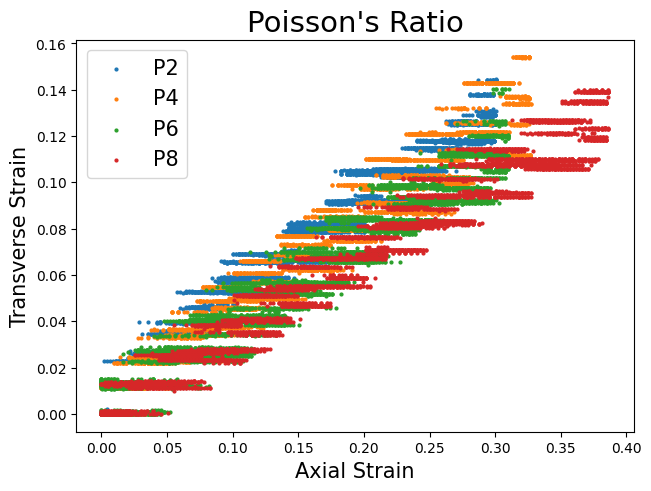

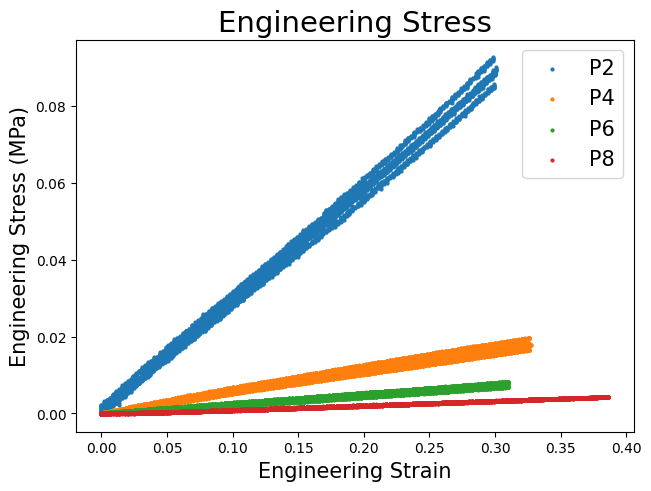

In [3]:
from pvc_tensile_experiment.Functions import DataCompile
import matplotlib.pyplot as plt; import numpy as np

# preallocate the suplots
fig, axs1 = plt.subplots(1,1, layout = "constrained")
fig, axs2 = plt.subplots(1,1, layout = "constrained")


# the desired plasticizer ratio 
for plastiRatio in ['P2', 'P4', 'P6', 'P8']:

    # read the processed data files 
    _, axStrain, _, transStrain, stress = DataCompile(f'Tensile Data/Elastic Data', plastiRatio)
    
    # define marker size
    size = 4

    # plot poissons ratio 
    axs1.scatter(axStrain[0:5000], transStrain[0:5000], label = f'{plastiRatio}', s = size)
    axs1.set_title("Poisson's Ratio", fontsize = 21)
    axs1.set_xlabel('Axial Strain', fontsize = 15)
    axs1.set_ylabel('Transverse Strain', fontsize = 15)
    axs1.legend(fontsize = 15)

    # plot engineering stress-strain
    axs2.scatter(axStrain[0:5000], stress[0:5000], s = size, label = f'{plastiRatio}')   
    axs2.set_xlabel('Engineering Strain', fontsize = 15)
    axs2.set_ylabel('Engineering Stress (MPa)', fontsize = 15)
    axs2.set_title('Engineering Stress', fontsize = 21)
    axs2.legend(fontsize = 15)

plt.show()

Overlay the best hyperelastic modeling datasets together compare platicizer

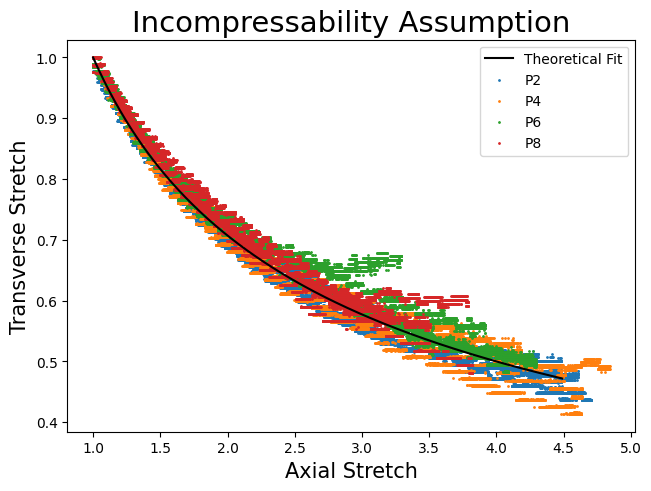

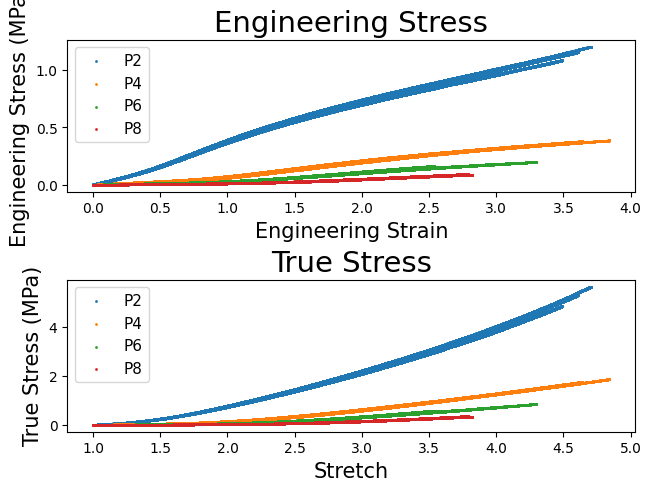

In [4]:
from pvc_tensile_experiment.Functions import DataCompile
import matplotlib.pyplot as plt; import numpy as np

# preallocate the suplots
fig, axs1 = plt.subplots(1,1, layout = "constrained")
fig, axs2 = plt.subplots(2,1, layout = "constrained")


# plot the ideal incompressability condition
stretch = np.arange(1.0, 4.5, 0.01)
axs1.plot(stretch, np.sqrt(1/stretch), label = 'Theoretical Fit', c = 'k')
axs1.legend(fontsize = 11)

# define marker size
size = 1

# the desired plasticizer ratio 
for plastiRatio in ['P2', 'P4', 'P6', 'P8']:

    # read the processed data files 
    _, axStrain, _, transStrain, stress = DataCompile(f'Tensile Data/Hyperelastic Data', plastiRatio)

    # find true strain and stress from engineering strain
    stretch = 1 + axStrain
    stretch2 = 1 + transStrain
    stressTrue = stress*stretch

    # plot inverse stretch ratio showing isotropic and incompressable
    axs1.scatter(stretch, -stretch2 + 2, label = f'{plastiRatio}', s = 1)
    axs1.set_title("Incompressability Assumption", fontsize = 21)
    axs1.set_xlabel('Axial Stretch', fontsize = 15)
    axs1.set_ylabel('Transverse Stretch', fontsize = 15)
    axs1.legend()

    # plot engineering stress-strain and true stress-strain
    axs2[0].scatter(axStrain, stress, s = size, label = f'{plastiRatio}')   
    axs2[1].scatter(stretch, stressTrue, label = f'{plastiRatio}', s = size)
    axs2[0].set_xlabel('Engineering Strain', fontsize = 15)
    axs2[1].set_xlabel('Stretch', fontsize = 15)
    axs2[0].set_ylabel('Engineering Stress (MPa)', fontsize = 15)
    axs2[1].set_ylabel('True Stress (MPa)', fontsize = 15)
    axs2[0].set_title('Engineering Stress', fontsize = 21)
    axs2[1].set_title('True Stress', fontsize = 21)
    axs2[0].legend(fontsize = 11)
    axs2[1].legend(fontsize = 11)
plt.show()

In [ ]:
"""Combine modeling datasets into one csv"""
from pvc_tensile_experiment.Functions import *; import numpy as np


# the desired plasticizer ratio 
for plastiRatio in ['P2', 'P4', 'P6', 'P8']:

    # compile all the data  
    _, axStrain, _, transStrain, stress = DataCompile(plastiRatio)

    # identify every 25th iteration
    index = np.arange(0, len(stress), 15)

    # use every 25th index and convert stress from MPa to Pa
    transStrain = transStrain[index]
    axStrain = axStrain[index]
    stretch = 1 + axStrain  
    stress = stress[index]

    # save the nominal stress and stretch data 
    df = pd.DataFrame(columns = ["Transverse Strain", "Eng. Axial Strain", "Eng. Stress (Pa)", "Stretch Ratio", "True Stress (Pa)"])
    df["Transverse Strain"] = transStrain
    df["Eng. Axial Strain"] = axStrain
    df["Eng. Stress (Pa)"] = stress    
    df["Stretch Ratio"] = stretch
    df["True Stress (Pa)"] = stress*stretch # conversion for uniaxial engineering stress to true stress
    
    # df.to_csv(f"Data/{plastiRatio} Uniaxial Tensile Data.csv", sep = ',', header = True, index = False)
